In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
df = pd.read_csv('Zomato_Chennai_Dataset.csv')

In [3]:
df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


# Getting Basic Information about the Dataset

In [4]:
df.shape

(12032, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
Zomato URL               12032 non-null object
Name of Restaurant       12032 non-null object
Address                  12032 non-null object
Location                 12032 non-null object
Cuisine                  12032 non-null object
Top Dishes               12032 non-null object
Price for 2              12032 non-null float64
Dining Rating            12032 non-null object
Dining Rating Count      12032 non-null object
Delivery Rating          12032 non-null object
Delivery Rating Count    12032 non-null object
Features                 12032 non-null object
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Price for 2
count,12032.000000
mean,397.611370
std,332.045938
min,40.000000
25%,200.000000
50%,300.000000
75%,450.000000
max,5000.000000


# Cleaning the Dataset

# a. Removing the Null Records

In [7]:
df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [8]:
# Droping the above row from the dataset

df = df.drop("Zomato URL", axis=1)

In [9]:
df.replace(to_replace = ['None','Invalid','Does not offer Delivery','Does not offer Dining','Not enough Delivery Reviews','Not enough Dining Reviews'], value =np.nan,inplace=True)
df.isnull().sum()

Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes               9641
Price for 2                 0
Dining Rating            5351
Dining Rating Count      5351
Delivery Rating          5851
Delivery Rating Count    5851
Features                    0
dtype: int64

In [10]:
df['name of restaurant'] = df['Name of Restaurant'].apply(lambda x: x.lower())
df['Top Dishes'] = df["Top Dishes"].astype(str)
df['Top Dishes'] = df['Top Dishes'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Cuisine'] = df["Cuisine"].astype(str)
df['Cuisine'] = df['Cuisine'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Features'] = df['Features'].apply(lambda x:x.replace('[','').replace(']','').replace("'",'').replace('  ','').split(','))
df['Dining Rating Count'] = df['Dining Rating Count'].astype("Float32")
df['Delivery Rating Count'] = df['Delivery Rating Count'].astype("Float32")

In [11]:
def locsplit(x):
    if len(x.split(','))==2:
        return x.split(',')[1].replace(' ','')
    else:
        return x

df['Location_2'] = df['Location'].apply(lambda x: locsplit(x))

In [12]:
print(len(df['Location'].unique()))
print(len(df['Location_2'].unique()))

268
140


In [13]:
zomato_df = df.copy()

In [14]:
zomato_df.head()

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,name of restaurant,Location_2
0,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,[Biryani],"[Bread Halwa, Chicken 65, Mutton Biryani, Chic...",500.0,4.3,1500.0,4.3,9306.0,"[Home Delivery, Indoor Seating]",yaa mohaideen briyani,Pallavaram
1,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"[Biryani, North Indian, Mughlai, Desserts, Bev...","[Beef Biryani, Beef Fry, Paratha, Paya, Brinja...",1000.0,4.4,3059.0,4.1,39200.0,"[Home Delivery, Free Parking, Table booking ...",sukkubhai biriyani,Alandur
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"[Biryani, North Indian, Chinese, Arabian]","[Brinjal Curry, Tandoori Chicken, Chicken Gril...",500.0,4.3,1361.0,4.4,10500.0,"[Home Delivery, Indoor Seating]",ss hyderabad biryani,Kodambakkam
3,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"[Burger, Fast Food, Finger Food, Beverages]",[Zinger Burger],500.0,4.0,1101.0,4.0,11200.0,"[Home Delivery, Free Parking, Card Upon Deli...",kfc,Perambur
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"[Chinese, Biryani, North Indian, Chettinad, Ar...","[Mutton Biryani, Chicken Rice, Tomato Rice, Sh...",450.0,4.2,617.0,4.1,22400.0,"[Home Delivery, Indoor Seating]",tasty kitchen,Perambur


# 5. Performing Exploratory Data Analysis

# Q1. Chennai Location Wise Distribution

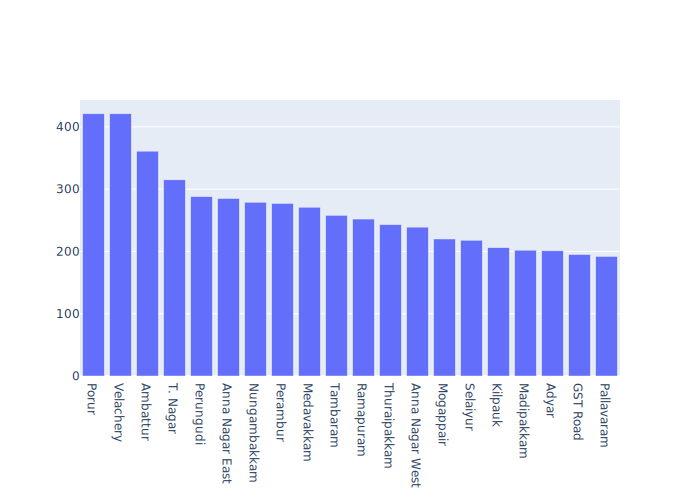

In [17]:
import plotly.offline as py
import plotly.graph_objs as go
fig = go.Figure(data=[go.Bar(x = df['Location_2'].value_counts()[:20].index.tolist(),
                y = df['Location_2'].value_counts()[:20].values.tolist())])

fig.show()

# Rating Distribution Location wise
# Q2. Dining Only Ratings?

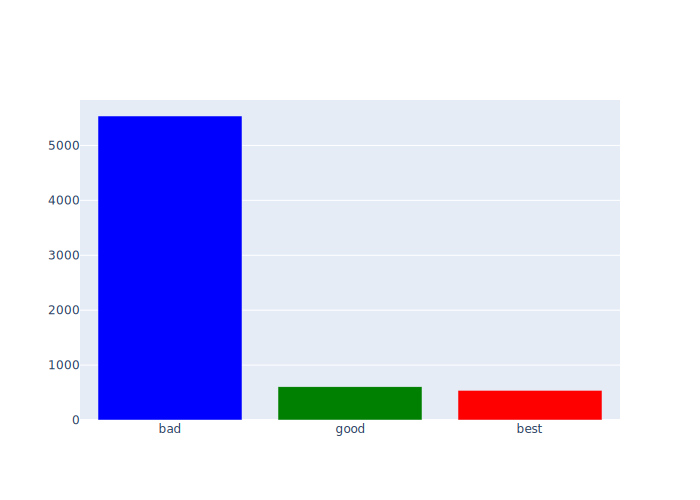

In [18]:
bins_r = [0,2.5,4,5]
group_r = ['bad','good','best']
df['Dining Rating'] = df['Dining Rating'].astype(float)
df['Dine_Verdict'] = pd.cut(df['Dining Rating'],bins_r,labels=group_r)
yv = df['Dine_Verdict'].value_counts().tolist()
colors = ['blue','green','red']
fig = go.Figure(data=[go.Bar(x=group_r,y=yv,marker_color=colors)])
fig.show()

# Q3) Delivery only Ratings¶

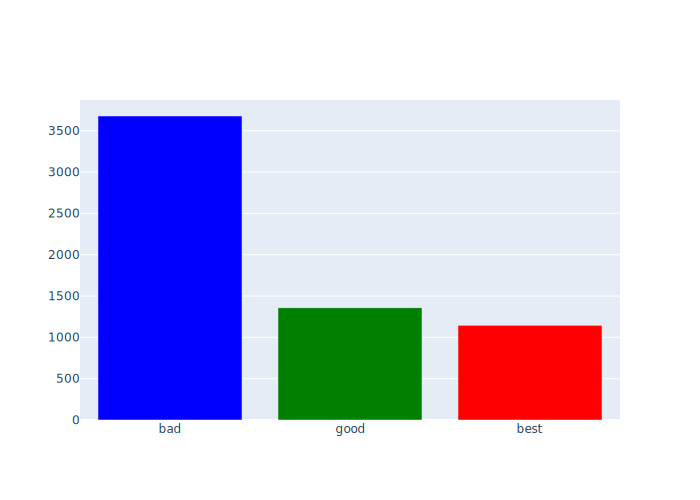

In [19]:
bins_r = [0,3.5,4,5]
group_r = ['bad','good','best']
df['Delivery Rating'] = df['Delivery Rating'].astype(float)
df['Delivery_Verdict'] = pd.cut(df['Delivery Rating'],bins_r,labels=group_r)
yv = df['Delivery_Verdict'].value_counts().tolist()
colors = ['blue','green','red']
fig = go.Figure(data=[go.Bar(x=group_r,y=yv,marker_color=colors)])
fig.show()

# Q4) Most number of Franchise

In [20]:
df['name of restaurant'].value_counts()[:25]

ck's bakery                  83
amma unavagam                78
domino's pizza               66
oyalo                        59
lassi shop                   58
cafe coffee day              51
five star chicken            50
meat and eat                 48
a2b - adyar ananda bhavan    45
ibaco                        44
hyku foods                   41
mcrennett                    39
the cake world               39
ovenstory pizza              38
subway                       38
sweet truth                  38
the biryani life             38
faasos                       38
firangi bake                 37
the good bowl                37
mumbai kulfi                 36
cake square                  36
behrouz biryani              36
pizza square                 34
sri krishna sweets           33
Name: name of restaurant, dtype: int64

# Q5) Price Comparision Location wise?

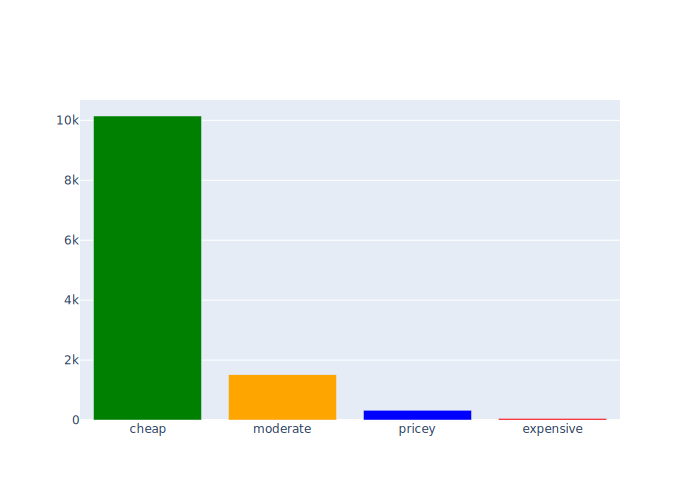

In [21]:
bins = [0,500,1000,2500,float("inf")]
groups = ['cheap','moderate','pricey','expensive']
df['Cost'] = pd.cut(df['Price for 2'], bins,labels=groups)
yc = df['Cost'].value_counts().tolist()
colors = ['green','orange','blue','red']
fig = go.Figure(data=[go.Bar(x=groups,y=yc,marker_color=colors)])
fig.show()

# Q6) Which places have the highest rated restaurant for each Cuisine Type in Chennai?

In [30]:
# Assuming restaurants having rating above 4.5

highest_rated_df = df[df['Dining Rating'] >= 4]
highest_rated_df

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,name of restaurant,Location_2,Dine_Verdict,Delivery_Verdict,Cost
0,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,[Biryani],"[Bread Halwa, Chicken 65, Mutton Biryani, Chic...",500.0,4.3,1500.0,4.3,9306.0,"[Home Delivery, Indoor Seating]",yaa mohaideen briyani,Pallavaram,best,best,cheap
1,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"[Biryani, North Indian, Mughlai, Desserts, Bev...","[Beef Biryani, Beef Fry, Paratha, Paya, Brinja...",1000.0,4.4,3059.0,4.1,39200.0,"[Home Delivery, Free Parking, Table booking ...",sukkubhai biriyani,Alandur,best,best,moderate
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"[Biryani, North Indian, Chinese, Arabian]","[Brinjal Curry, Tandoori Chicken, Chicken Gril...",500.0,4.3,1361.0,4.4,10500.0,"[Home Delivery, Indoor Seating]",ss hyderabad biryani,Kodambakkam,best,best,cheap
3,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"[Burger, Fast Food, Finger Food, Beverages]",[Zinger Burger],500.0,4.0,1101.0,4.0,11200.0,"[Home Delivery, Free Parking, Card Upon Deli...",kfc,Perambur,good,good,cheap
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"[Chinese, Biryani, North Indian, Chettinad, Ar...","[Mutton Biryani, Chicken Rice, Tomato Rice, Sh...",450.0,4.2,617.0,4.1,22400.0,"[Home Delivery, Indoor Seating]",tasty kitchen,Perambur,best,best,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10063,Cold Stone Creamery,"Plot 1, Gentle Tides, East Coast Road, Injamb...",Akkarai,"[Desserts, Ice Cream]",[nan],500.0,4.1,169.0,4.1,296.0,"[Home Delivery, Vegetarian Only, Indoor Seat...",cold stone creamery,Akkarai,best,best,cheap
10066,Pizza Republic,"25, Kamaraj Street, Near Repco Home Finance.,...",Tambaram,[Pizza],"[Pizza, Garlic Bread, Salad, Pasta]",500.0,4.1,209.0,4.0,912.0,"[Home Delivery, Indoor Seating]",pizza republic,Tambaram,best,good,cheap
10135,Madrasi Biryani,"22, TS Ezhumalai Complex, OMR Road, Kelambakk...",Kelambakkam,"[Biryani, South Indian]","[Paratha, Chicken Chukka Biryani, Chicken Loll...",400.0,4.1,136.0,3.7,1440.0,"[Home Delivery, Indoor Seating]",madrasi biryani,Kelambakkam,best,good,cheap
10423,Kailash Parbat,"9, Atop French Loaf,2nd Avenue, Harrington, C...",Chetpet,"[North Indian, Street Food, Fast Food]","[Chaat, Panipuri, Sandwich, Paneer Khurchan, B...",600.0,4.3,907.0,3.9,1192.0,"[Breakfast, Home Delivery, Vegetarian Only, ...",kailash parbat,Chetpet,best,good,moderate


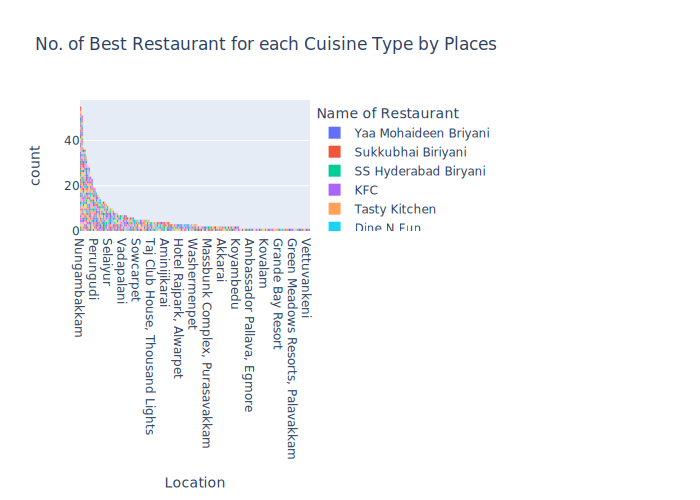

In [33]:
fig = px.histogram(highest_rated_df, x='Location', color='Name of Restaurant',
             title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descending")
fig.show()

# Q7) Find the list of Affordable Restaurants?

In [41]:
max_price = zomato_df['Price for 2'].max()
one_fourth_price = max_price/4
one_fourth_price

1250.0

In [42]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
aff_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location']]
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] <= 1250]
aff_rest_df.sort_values(by='Price for 2', inplace=True)
aff_rest_df

,Name of Restaurant,Price for 2,Cuisine,Location
4685,Soda Hub,40.0,[Beverages],"OMR Food Street, Navallur"
6854,Planet Soda,50.0,"[Beverages, Juices]","OMR Food Street, Kandanchavadi"
7405,Indian Coffee House,50.0,"[Beverages, Juices]",Vepery
8355,Kaafemaa,50.0,[Beverages],Ambattur
1448,Mamee Soup,60.0,[Healthy Food],West Mambalam
...,...,...,...,...
6746,Biryani Centre,1200.0,[Biryani],Triplicane
165,Copper Chimney,1200.0,"[North Indian, Arabian, Biryani, Mughlai]",Gopalapuram
316,Prive Restaurant,1200.0,"[North Indian, Continental, Mexican, Chinese, ...",Mylapore
3697,Zhouyu,1200.0,[Asian],Alwarpet
